# What are synestias?
Synestias are a new type of planetary structure (think planets, moons, and planetary disks) discovered by Lock and Stewart (2017). But, what are synestias? Let's use the following notebook to build some inutition and insight for the physical properties of synestias.

What does a synestia look like?

In [15]:
#LOAD GADGET-2 SNAPSHOT OF SYNESTIA
%run synfits.py
#CREATE AN RXY ARRAY
rxyarr=np.linspace(7.,100.,200) #Mm
#from scipy.interpolate import LSQUnivariateSpline
#from scipy.optimize import least_squares
#from scipy.interpolate import interp1d

Read 180233 particles from TE_Example01_Cool05_snapshot_4096_long
Read 201779 particles from TE_Example03_Cool01_snapshot_10500_long
Read 100989 particles from TE_Example07_CoolB01_snapshot_7200_long


In [67]:
#3D IMAGE OF PHYSICAL SHAPE OF SYNESTIA; INCLUDE LINK TO PAPERS ABOUT SYNESTIAS
#GRAVITY FIELD OF SYNESTIA
#CONVERT FROM CYLINDRICAL TO CARTESIAN
import math
nangles=8
theta=np.arange(0.,2*math.pi,2*math.pi/nangles)
s_cyl=np.linspace(0.,100.,50)
ztest=np.linspace(0.,100.,50)
X=[s_cyl*np.cos(angle) for angle in theta]
#make 8 different angles
Y=np.empty([len(s_cyl),len(theta)])
Y=[s_cyl*np.sin(angle) for angle in theta]
Ynew=np.ma.masked_where(np.abs(Y)<1e-10,Y)
Ynew=np.ma.filled(Ynew,0.0)
Xnew=np.ma.masked_where(np.abs(X)<1e-10,X)
Xnew=np.ma.filled(Xnew,0.0)
Z=np.empty([len(theta),len(s_cyl)])
Z=[ztest for angle in theta]
Xgrid,Ygrid=np.meshgrid(Xnew,Ynew)
test,Zgrid=np.meshgrid(Xnew,Z)

In [ ]:
#GRAVITY FIELD
#plot vector field

<IPython.core.display.Javascript object>


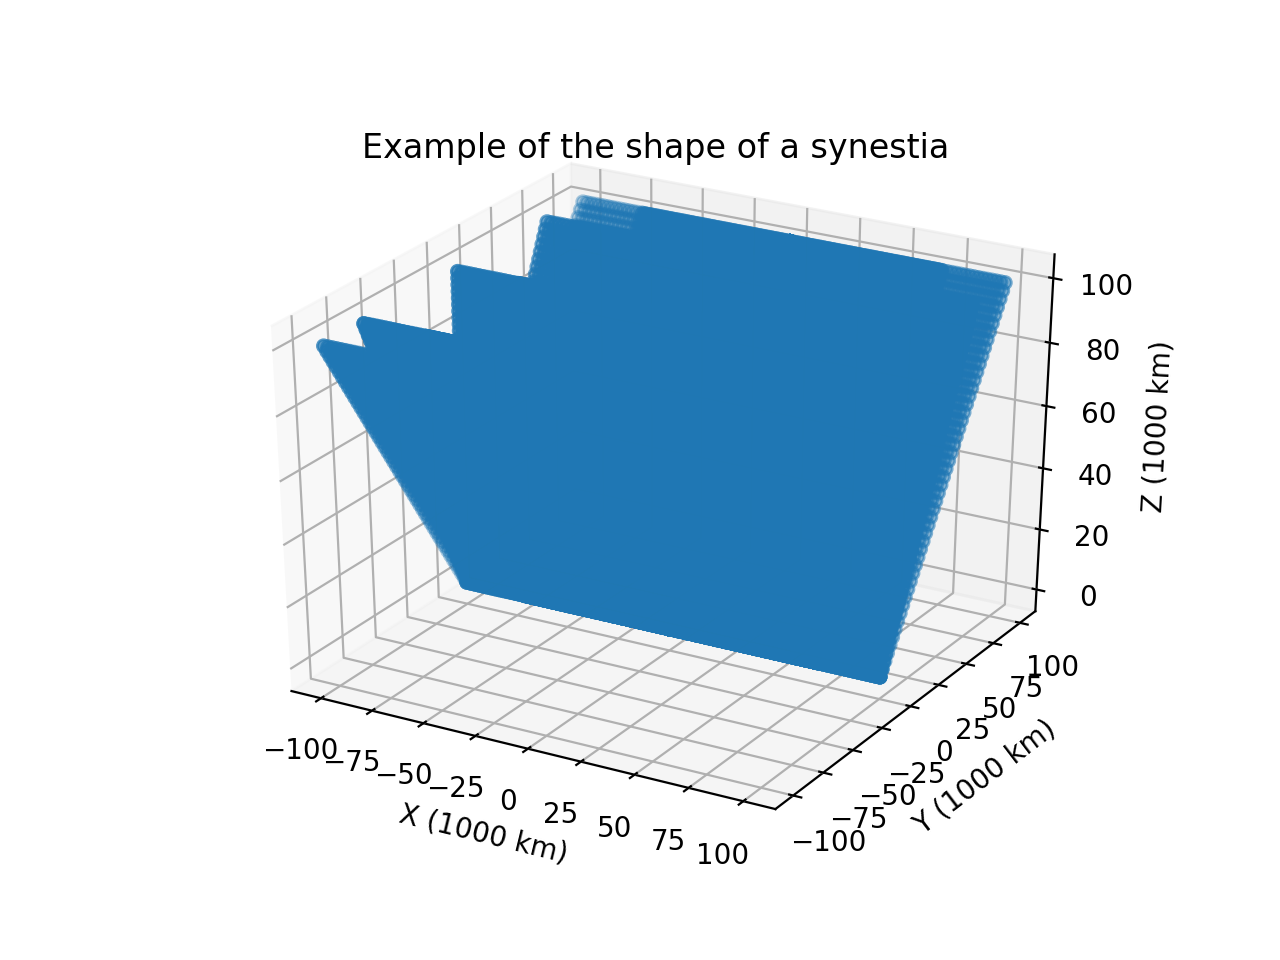

In [68]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib notebook
fig=plt.figure()
ax=fig.gca(projection='3d')
#nsamp=1000
#X,Y,Z=SNAP.x[:nsamp]/1e6,SNAP.y[:nsamp]/1e6,SNAP.z[:nsamp]/1e6
ax.scatter3D(Xgrid,Ygrid,Zgrid,'.')
###PLOT WHERE PHOTOSPHERE IS -- WHERE P IS ON VAPOR DOME FOR ENTROPY AT HEIGHT
#ax.plot_trisurf(X,Y,Z,cmap='Blues')
#ax.contour3D(X,Y,Z,50,cmap='binary')
#ax.plot_surface(X,Y,Z,rstride=8,cstride=8,alpha=0.5)
#cset=ax.contourf(X,Y,Z,zdir='z',offset=-100,cmap='coolwarm')
#cset=ax.contourf(X,Y,Z,zdir='x',offset=-40,cmap='coolwarm')
#cset=ax.contourf(X,Y,Z,zdir='y',offset=40,cmap='coolwarm')
#ax.set_xlim(-100,100)
#ax.set_ylim(-100,100)
#ax.set_zlim(-100,100)
ax.set_xlabel('X (1000 km)')
ax.set_ylabel('Y (1000 km)')
ax.set_zlabel('Z (1000 km)')
plt.title('Example of the shape of a synestia')
plt.draw()

You'll notice that synestias are very large planetary objects. They span about 200,000 km across (124,000 miles) -- that's almost 16 Earths! This synestia was formed as a result of a potential-Moon-forming giant impact. A giant impact is a collision between massive planetary objects. Giant impacts deposit enough energy into the impacted material to vaporize rock (about the total daily energy output from the Sun). Synestias have a large (10-20% of total mass) vapor component which makes them very hot, extended and puffy.

What does "very hot" mean?

<IPython.core.display.Javascript object>


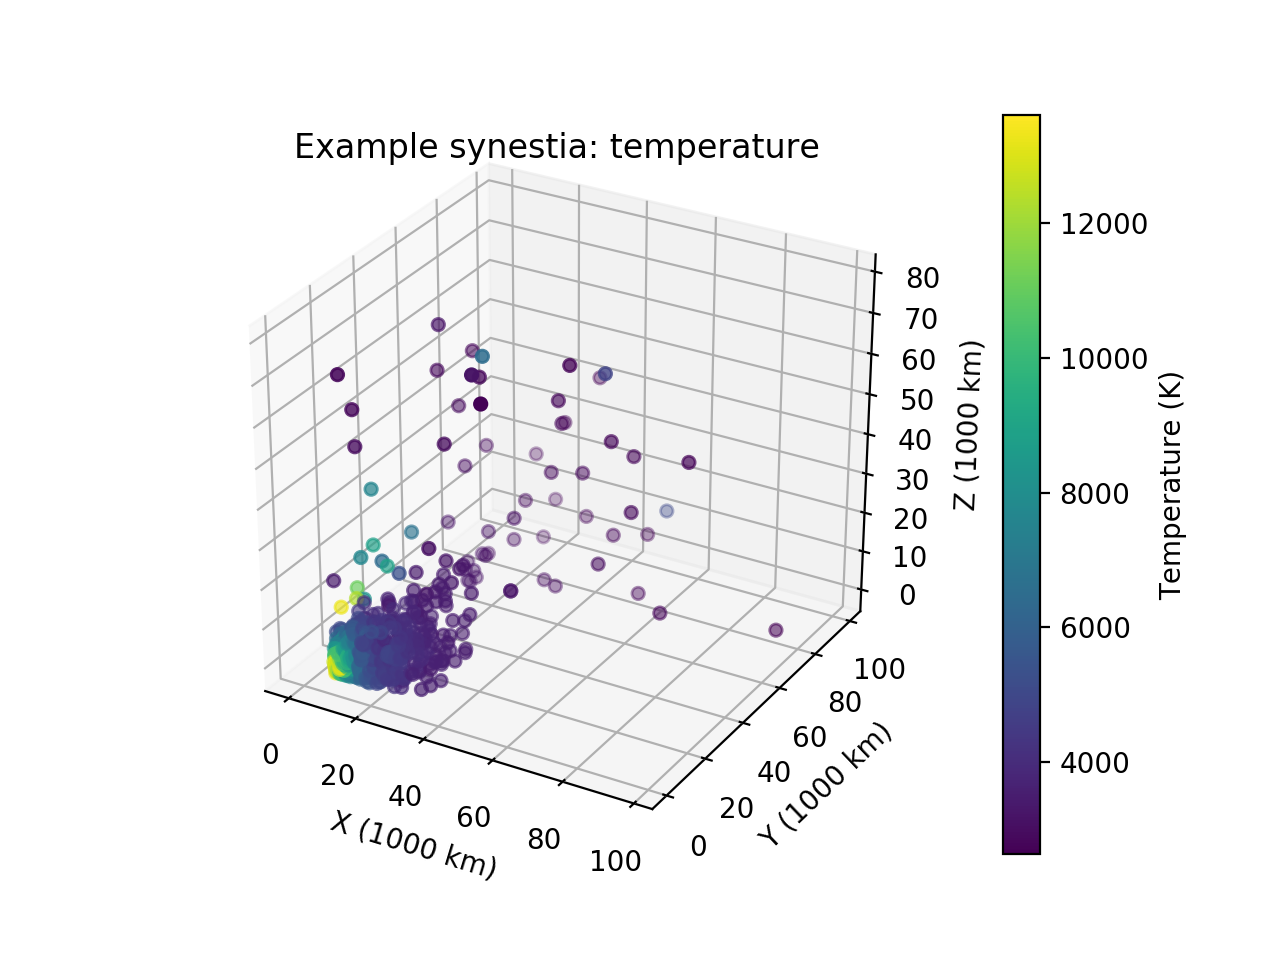

[[13610.14453125 13610.14453125 13610.14453125 ...  3049.58984375
   3049.58984375  3049.58984375]
 [13610.14453125 13610.14453125 13610.14453125 ...  3049.58984375
   3049.58984375  3049.58984375]
 [13610.14453125 13610.14453125 13610.14453125 ...  3049.58984375
   3049.58984375  3049.58984375]
 ...
 [13610.14453125 13610.14453125 13610.14453125 ...  3049.58984375
   3049.58984375  3049.58984375]
 [13610.14453125 13610.14453125 13610.14453125 ...  3049.58984375
   3049.58984375  3049.58984375]
 [13610.14453125 13610.14453125 13610.14453125 ...  3049.58984375
   3049.58984375  3049.58984375]]


In [162]:
#TEMPERATURE
T=SNAP.T[:nsamp]
fig2=plt.figure()
ax2=fig2.gca(projection='3d')
#import matplotlib.tri as mtri
#tri=mtri.Triangulation(testx.flatten(),testy.flatten())
#cset=ax2.plot_trisurf(testx,testy,testz,tri.triangles[2],cmap='viridis')
Xnew=np.linspace(0,40)
Ynew=np.linspace(0,40)
Znew=np.linspace(0,40)
Xgrid,Ygrid=np.meshgrid(Xnew,Ynew)
Zgrid,test=np.meshgrid(Znew,Znew)
Zgrid=np.ones(np.shape(Xgrid))*Znew.T
from scipy.interpolate import griddata
#do interpolations on r,z data then treat as symmetric and do for different angles (8+)
Tgrid=griddata((np.abs(X),np.abs(Y),np.abs(Z)),T,(Xgrid,Ygrid,Zgrid),method='nearest')
import matplotlib.colors
minT, maxT = T.min(), T.max()
norm = matplotlib.colors.Normalize(minT, maxT)
m = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
def clrs(color_dimension):
    m.set_array([])
    fcolors = m.to_rgba(color_dimension)
    fcolorsb = fcolors.ravel().tolist()
    fcolorsc = []
    for i in range(len(fcolorsb)):
        if i%4 is 0:
            j=i+1
            k=i+2
            l=i+3
            fcolorsc.append((fcolorsb[i],fcolorsb[j],fcolorsb[k],fcolorsb[l]))
    return fcolorsc
X0=np.zeros(np.shape(Xgrid))
Y0=np.zeros(np.shape(Xgrid))
Z0=np.zeros(np.shape(Xgrid))
Tgridx=griddata((np.abs(X),np.abs(Y),np.abs(Z)),T,(X0,Ygrid,Zgrid),method='nearest')
Tgridy=griddata((np.abs(X),np.abs(Y),np.abs(Z)),T,(Xgrid,Y0,Zgrid),method='nearest')
print(Tgridy)
Tgridz=griddata((np.abs(X),np.abs(Y),np.abs(Z)),T,(Xgrid,Ygrid,Z0),method='nearest')
fcx=clrs(Tgridx)
fcy=clrs(Tgridy)
fcz=clrs(Tgridz)
cset2=ax2.scatter3D(np.abs(X),np.abs(Y),np.abs(Z),c=T,cmap='viridis')
#cset2=ax2.scatter3D(Xgrid,Ygrid,Zgrid,c=Tgrid,cmap='viridis')
#cset2=ax2.contourf(Xgrid,Ygrid,Z0,zdir='z',colors=fcz)
cset2=ax2.contourf(Xgrid,Y0,Zgrid,zdir='y',offset=100,colors=fcy)
#cset2=ax2.contourf(X0,Ygrid,Zgrid,zdir='x',colors=fcx)
#cset2=ax2.contourf(Xgrid,Zgrid,Tgrid,zdir='y',cmap='viridis')
#cset2=ax2.contourf(Zgrid,Ygrid,Tgrid,zdir='x',cmap='viridis')
#ax2.set_xlim(0,100)
#ax2.set_ylim(0,100)
#ax2.set_zlim(0,100)
ax2.set_xlabel('X (1000 km)')
ax2.set_ylabel('Y (1000 km)')
ax2.set_zlabel('Z (1000 km)')
fig2.colorbar(m,label='Temperature (K)')
plt.title('Example synestia: temperature')
plt.draw()

Pretty darn hot! We would all be incinerated. Imagine a volcanic eruption, but # times hotter. There is no solid surface upon which we could stand, but if we somehow were floating in the moon-forming region of a synestia, it would feel like a hot, heavy atmospheric blanket. (compare to our atmospheric pressure and how sensitive our ears are to slight pressure change, feel like being squeezed?)

In [4]:
#PRESSURE & DENSITY
knots = [1,2,3]
pknots = [knots]
print(pknots)

SyntaxError: invalid syntax (<ipython-input-4-1c6164ab2f9f>, line 3)

There are many different kinds of impacts that can create a synestia: 1) a small body slowly grazes a large body, 2) two equal size bodies impact each other at almost the escape velocity 3) , and 4) .

In [ ]:
#FIGURE DIAGRAM OF IMPACT CASES
#SHOW PRESSURE, TEMPERATURE, DENSITY OF EACH

If a wide range of giant impacts can form a synestia, what is the threshold for what defines a synestia? Let's first think about the internal structure and dynamics of a synestia in terms of angular velocity.

There are two ways to think about angular velocity.

Case one: body 1 is orbiting body 2. For example, the Earth travels around the Sun. The velocity with which the Earth orbits the Sun is the Earth's angular velocity. The farther body 1 is from body 2, the faster their linear velocity will be to complete an orbit in the same amount of time (in order to maintain their angular velocity).

In [ ]:
#INSERT DIAGRAM OF ORBIT

Case two: a component of a body rotates within and as part of a single body; every component of a single body is rotating about an axis of rotation. For example, a figure skater spins; since each part of their body is connected [think of your body as a connected collection of very small volumes (e.g. cells)], every component rotates together at the same angular velocity. This is the case we will be thinking about when we define a synestia.

In [ ]:
#INSERT DIAGRAM OF ORBIT & SKATER

What if there was a rotating body that could not rotate together at the same angular velocity? This is the case for a synestia.

Let's say you and a friend sat on the edge of a playground merry-go-round (also known as a roundabout). You are sitting closer to the center and are strapped in place, while your friend is at the very edge free of restraints. If you join hands and hold on to each other while a third person spins the merry-go-round faster and faster, you'll reach a point where your hands cannot hold on. Your friend will be subject to their own speed of rotation about the merry-go-round as they fly off. This is essentially what happens when a planetary object transforms into a synestia.

In [ ]:
#INSERT DIAGRAM OF MERRY-GO-ROUND

A synestia is a planetary body (planet, for example) that is rotating so rapidly that its outer portion cannot "hold on" (the body crosses a threshold called the corotation limit) and moves at an angular velocity dictated by the gravity and gas (pressure) fields. This rapid rotation causes oblation, or a bulge along the equator, in the planet-like region.

In [ ]:
#INSERT FIGURE OF ANGULAR VELOCITY PROFILE OF SYNESTIA; CONTRAST WITH LINEAR VELOCITY

This is a plot of the midplane (z = 0) angular velocity profile. The profile is continuous because there are no dynamically distinct features of a synestia. It is a connected body. Notice that the profile is flat at smaller radii. This is the corotating portion of a synestia. All material rotates about its axis together at the same angular velocity. At larger radii, the profile drops off, where material in a synestia can no longer corotate.

The angular velocity is lower than what it would be for a Keplerian orbit. A Keplerian orbit is a stable (no inward or outward spiralling) elliptical orbit. The orbiting body is moving fast enough through a vacuum around its central body to resist the inward pull of the central body's first-order gravity. In other words, the only force that is acting (and is balanced) is gravity. In the non-corotating region of a synestia, the material experiences a sub-Keplerian orbit. There is sufficient pressure support to counteract gravity. This allows the gas to orbit at an angular velocity that is slower than it would be for an equivalent Keplerian orbit.

What I have shown you is what the internal dynamics and structure of a synestia is a couple of days after the giant impact that formed it. A synestia is not a static body. Unlike the Earth, a synestia's shape will drastically evolve with time. The photosphere of a synestia, the optically thin layer enveloping a synestia, is in contact with cold, vacuum-like space. The photosphere will radiate away heat, causing the outer layers of vapor to condense into rock rain. its shape will remain spherical for some time.
(However, the shape of s synestia will evolve drastically over time as its hot rock vapor radiates heat into space.) Eventually, a synestia will shrink and condense, with its outer edge truncating with time. It will cool and shrink and eventually transition into a rapidly rotating planet.

In [ ]:
#TIME EVOLUTION OF SYNESTIA

Some of largest planetary structures are moons, planets, planetary disks (planets with disks), and synestias. How is a planet with an orbiting debris disk different from a synestia?

In [ ]:
#REFERENCES